In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_json('News_Category_Dataset_v3.json', lines = True)


## Data Overview

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
data.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
print("Categories:")
categories = data['category'].unique()
for category in categories:
    print(category)

Categories:
U.S. NEWS
COMEDY
PARENTING
WORLD NEWS
CULTURE & ARTS
TECH
SPORTS
ENTERTAINMENT
POLITICS
WEIRD NEWS
ENVIRONMENT
EDUCATION
CRIME
SCIENCE
WELLNESS
BUSINESS
STYLE & BEAUTY
FOOD & DRINK
MEDIA
QUEER VOICES
HOME & LIVING
WOMEN
BLACK VOICES
TRAVEL
MONEY
RELIGION
LATINO VOICES
IMPACT
WEDDINGS
COLLEGE
PARENTS
ARTS & CULTURE
STYLE
GREEN
TASTE
HEALTHY LIVING
THE WORLDPOST
GOOD NEWS
WORLDPOST
FIFTY
ARTS
DIVORCE


In [ ]:
data['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

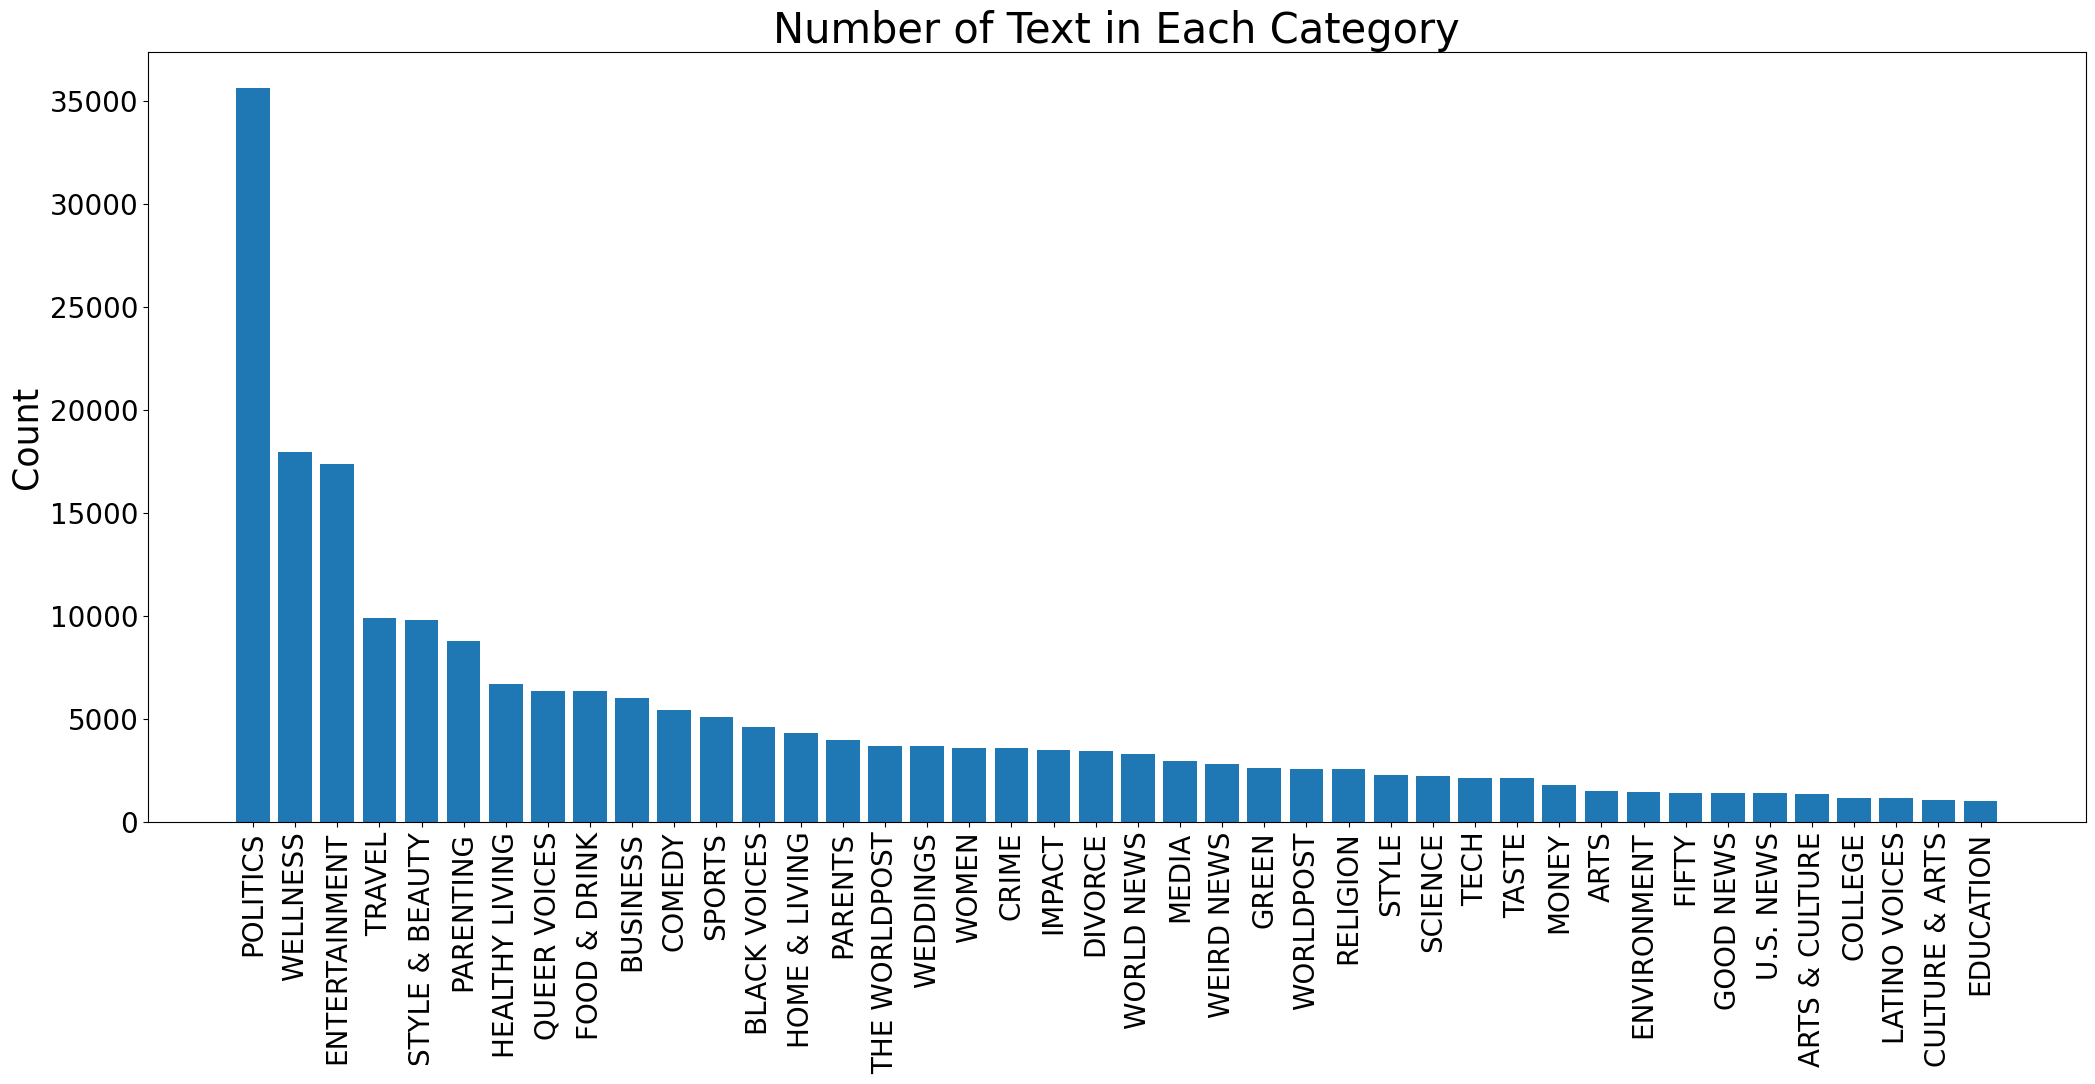

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(data['category'].value_counts().index, data['category'].value_counts().values)
plt.title("Number of Text in Each Category", fontsize=30)
plt.ylabel("Count", fontsize=25)

plt.yticks(rotation=0,fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.show()

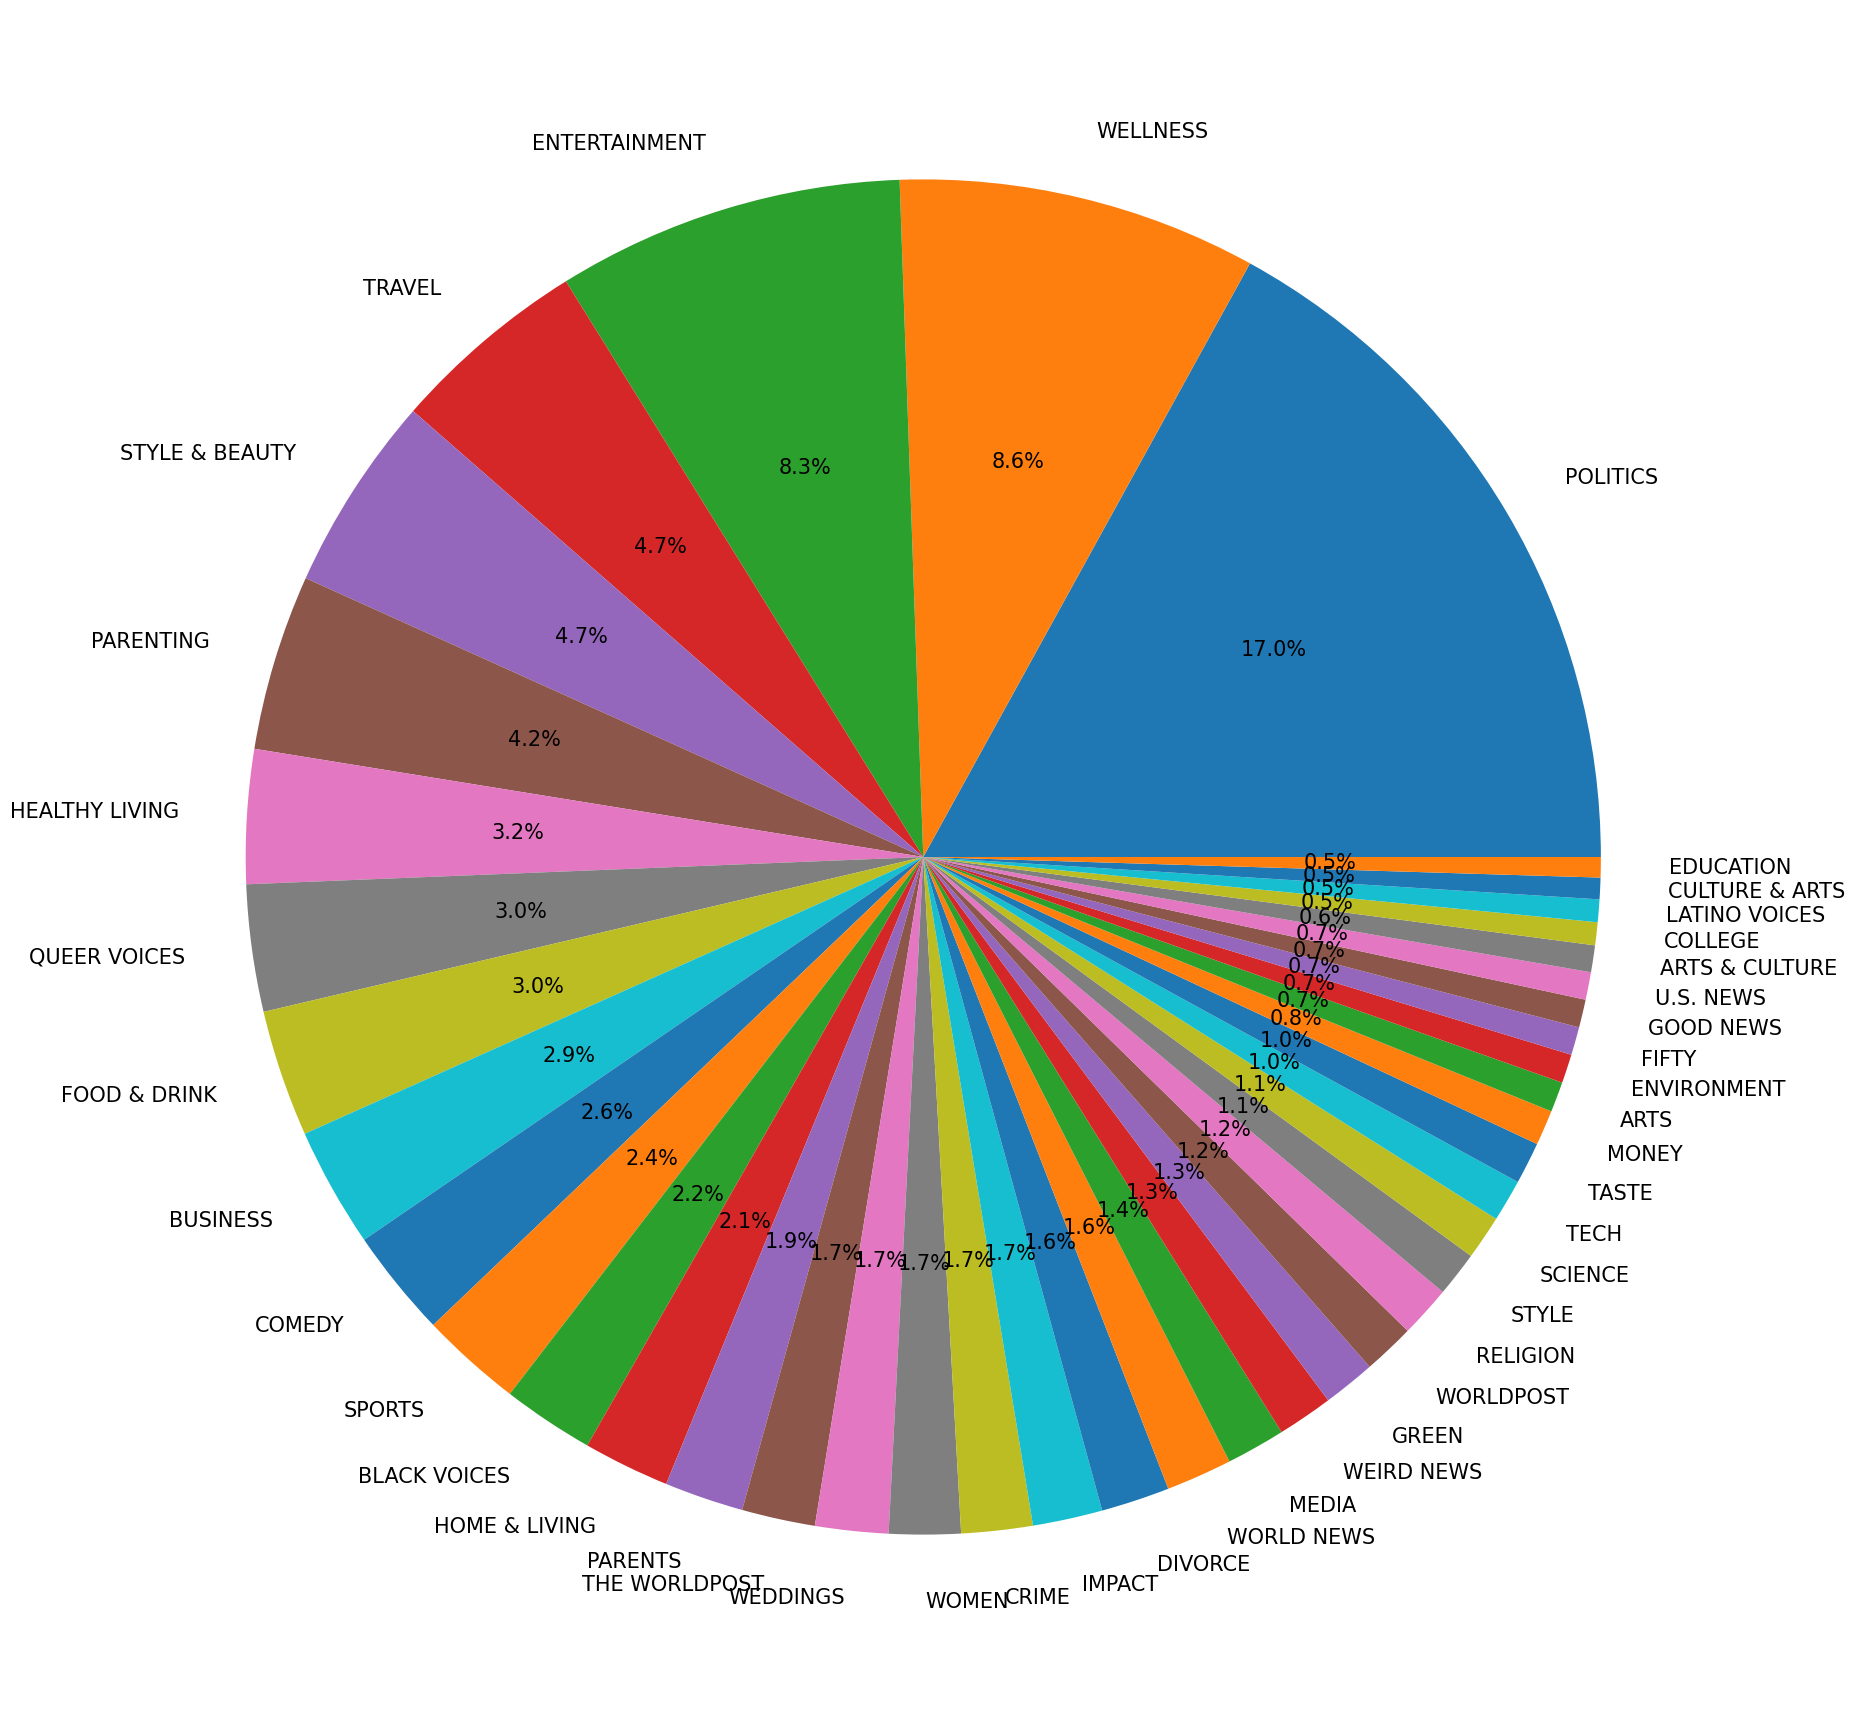

In [ ]:
plt.figure(figsize=(22,22))
plt.pie(data['category'].value_counts().values, autopct="%1.1f%%", labels=data['category'].value_counts().index)
plt.rcParams['font.size'] = 20
plt.show()

In [ ]:
data['category']=data['category'].replace({
    "HEALTHY LIVING": "WELLNESS",
    "PARENTS": "PARENTING",
    "STYLE": "STYLE & BEAUTY",
    "GREEN": "ENVIRONMENT",
    "TASTE": "FOOD & DRINK",
    "SCIENCE": "SCIENCE & TECH",
    "TECH": "SCIENCE & TECH",
    "MONEY": "BUSINESS",
    "ARTS": "ARTS & CULTURE",
    "COLLEGE": "EDUCATION",
    "CULTURE & ARTS": "ARTS & CULTURE"})

In [ ]:
data['category'].value_counts()

POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
PARENTING         12746
STYLE & BEAUTY    12068
TRAVEL             9900
FOOD & DRINK       8436
BUSINESS           7748
QUEER VOICES       6347
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
SCIENCE & TECH     4310
ENVIRONMENT        4066
ARTS & CULTURE     3922
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
WORLDPOST          2579
RELIGION           2577
EDUCATION          2158
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
LATINO VOICES      1130
Name: category, dtype: int64

In [ ]:
data['article'] = data['headline'] + " " + data['short_description']
data = data.loc[:, ['category', 'article']]
data.head(5)

,category,article
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...


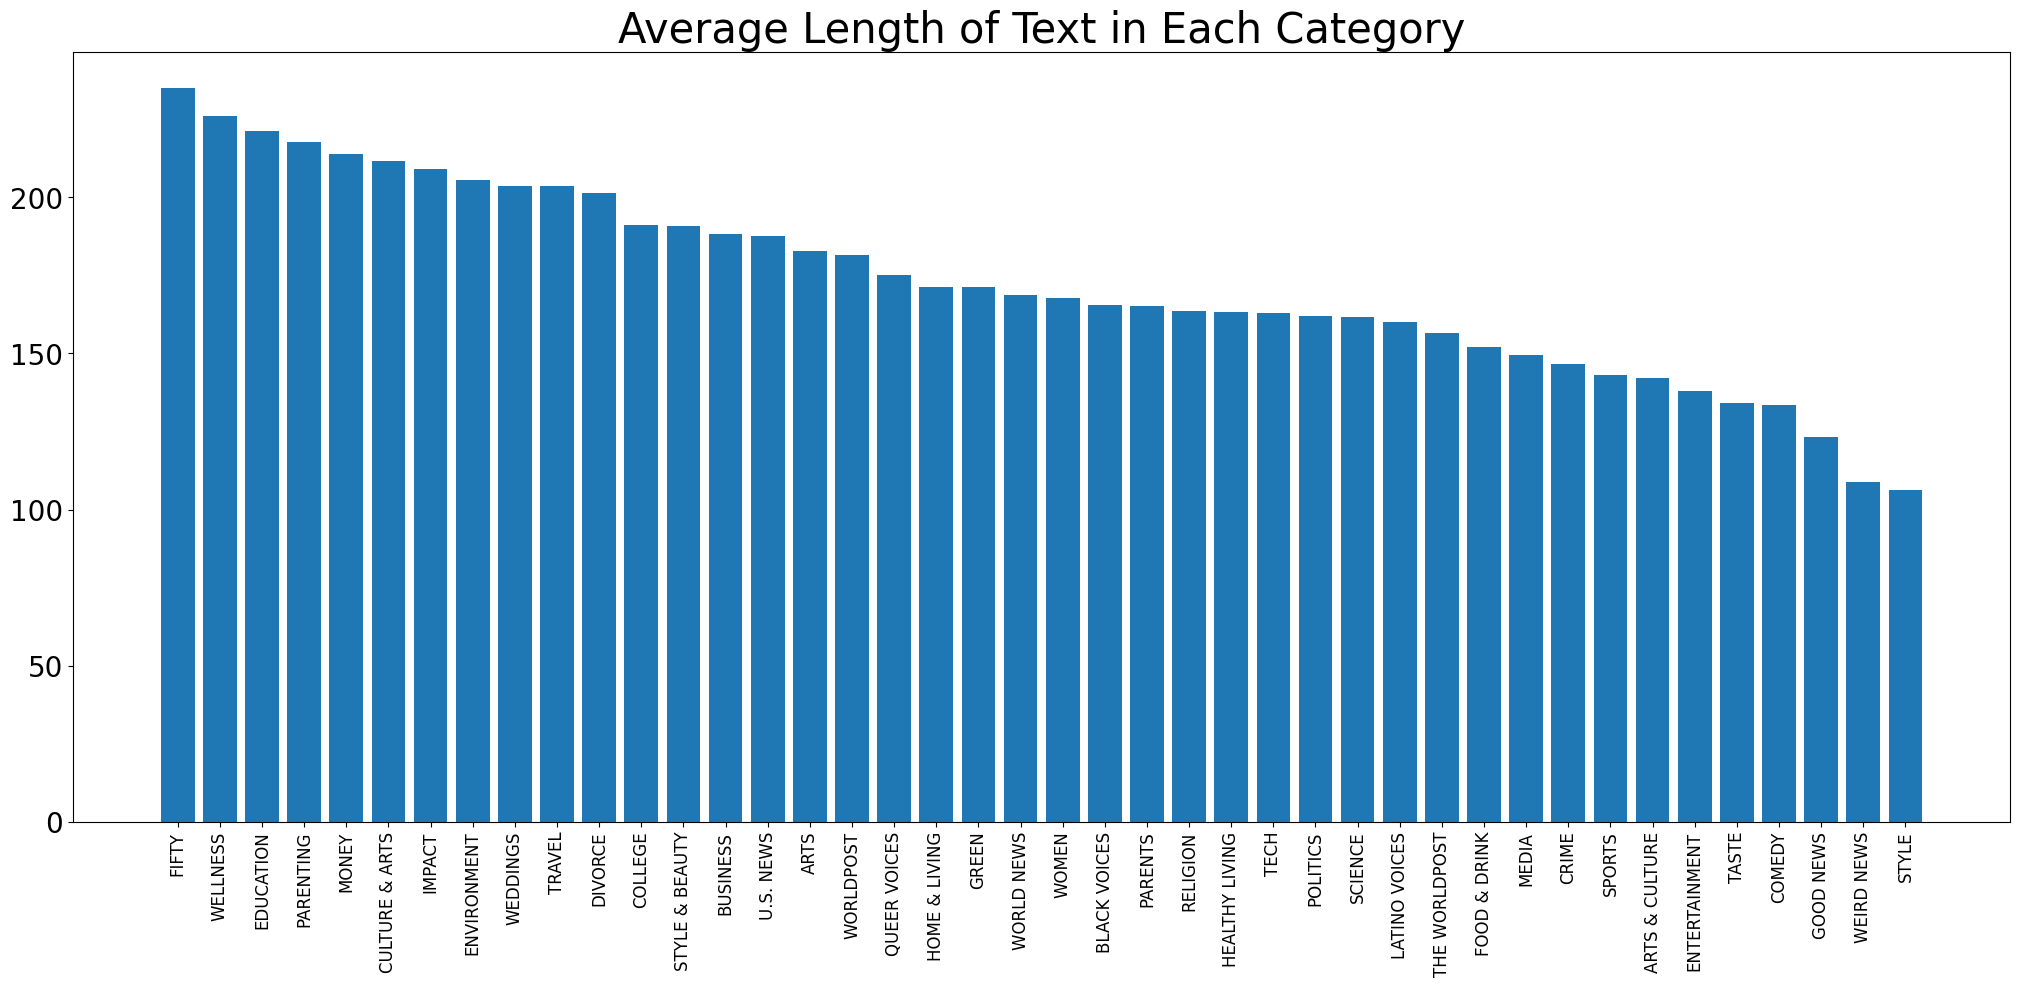

,category,news_len
12,FIFTY,234.875089
38,WELLNESS,226.078183
9,EDUCATION,221.154832
22,PARENTING,217.635081
21,MONEY,214.017654
7,CULTURE & ARTS,211.673184
18,IMPACT,209.045637
11,ENVIRONMENT,205.406510
36,WEDDINGS,203.612921
34,TRAVEL,203.532424


In [ ]:
data['news_len'] = data['article'].apply(lambda x: len(x))
news_length = data.groupby('category')['news_len']
news_length = news_length.mean().reset_index().sort_values(by='news_len',ascending=False)
plt.figure(figsize=(25,10))
news_length_x = news_length['category']
news_length_y = news_length['news_len']
plt.bar(news_length_x, news_length_y)
plt.title("Average Length of Text in Each Category", fontsize=30)
plt.yticks(rotation=0,fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.show()
news_length

In [ ]:
print("Average Length of Text:", data.news_len.mean())

Average Length of Text: 173.62402458871648


In [ ]:
data = data[data.category.isin(["POLITICS", "WELLNESS", "ENTERTAINMENT", "PARENTING", "STYLE & BEAUTY", "TRAVEL", "FOOD & DRINK", "BUSINESS", "COMEDY", "SPORTS"])]
data['category'].value_counts()


POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
PARENTING         12746
STYLE & BEAUTY    12068
TRAVEL             9900
FOOD & DRINK       8436
BUSINESS           7748
COMEDY             5400
SPORTS             5077
Name: category, dtype: int64

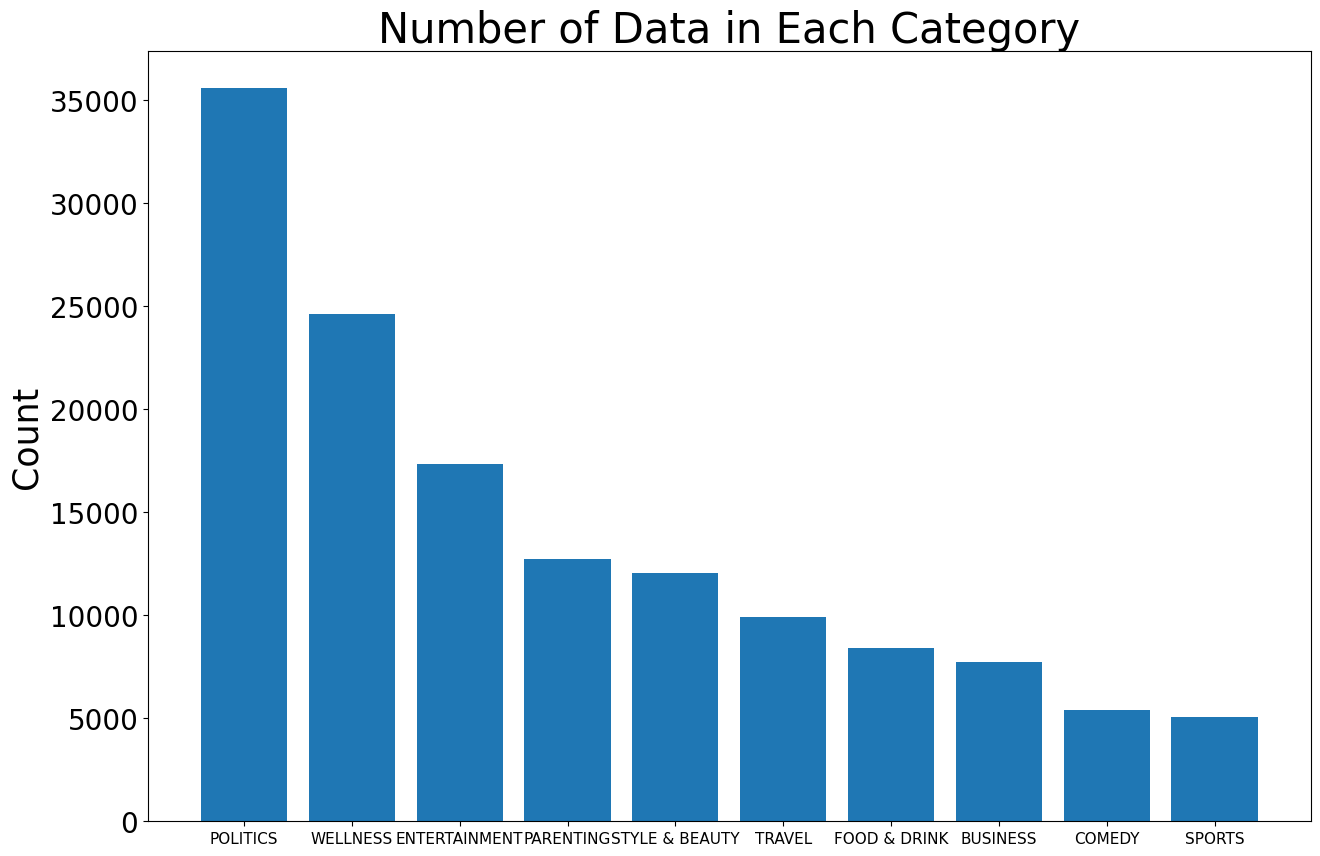

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(data['category'].value_counts().index, data['category'].value_counts().values)
plt.title("Number of Data in Each Category", fontsize=30)
plt.ylabel("Count", fontsize=25)

plt.yticks(rotation=0,fontsize=20)
plt.xticks(rotation=0,fontsize=11)
plt.show()

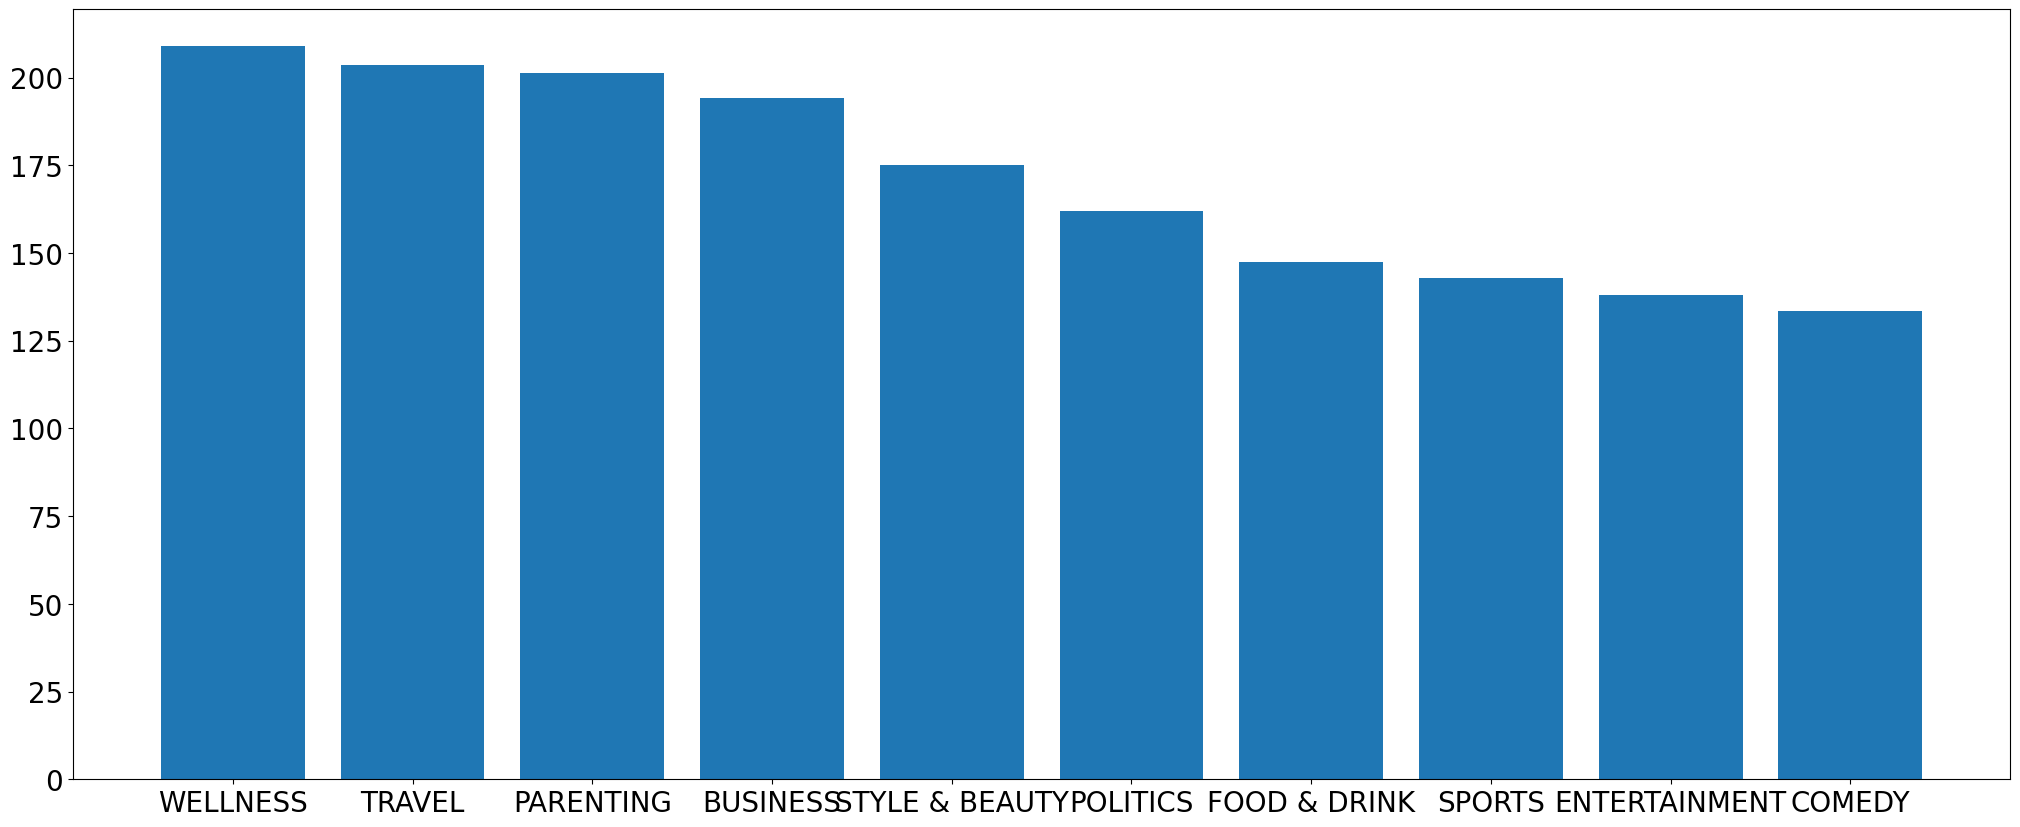

,category,news_len
9,WELLNESS,209.027152
8,TRAVEL,203.532424
4,PARENTING,201.391103
0,BUSINESS,194.136293
7,STYLE & BEAUTY,175.041763
5,POLITICS,161.938543
3,FOOD & DRINK,147.525960
6,SPORTS,142.959031
2,ENTERTAINMENT,137.989863
1,COMEDY,133.585741


In [ ]:
data['news_len'] = data['article'].apply(lambda x: len(x))
news_length = data.groupby('category')['news_len']
news_length = news_length.mean().reset_index().sort_values(by='news_len',ascending=False)
plt.figure(figsize=(25,10))
news_length_x = news_length['category']
news_length_y = news_length['news_len']
plt.bar(news_length_x, news_length_y)
plt.yticks(rotation=0,fontsize=20)
plt.xticks(rotation=0,fontsize=20)
plt.show()
news_length

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb09bbe0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb09bbe1c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb0b8284760>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb09bbe32e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb09bbe3340>],
 'means': []}

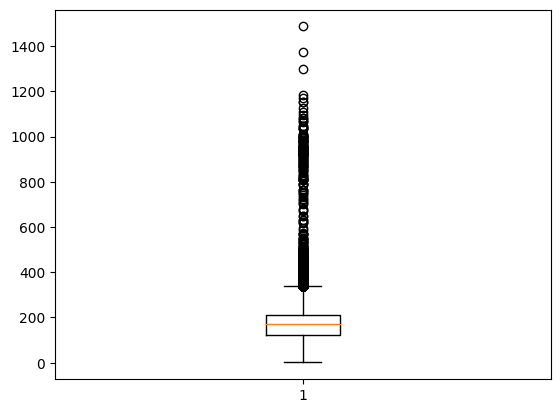

In [ ]:
plt.boxplot(data['news_len'])

# Preprocessing

In [ ]:
data["article"] = data["article"].str.lower()
data["article"] = data["article"].str.replace('[^\w\s]','')
data["article"] = data["article"].str.replace('\d+', '')
data["article"] = data["article"].str.replace('\s+', ' ')
data["article"] = data["article"].str.replace('  ', ' ')
data["article"] = data["article"].str.strip()
data.head(5)

<ipython-input-143-f8408521eed0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["article"] = data["article"].str.replace('[^\w\s]','')
<ipython-input-143-f8408521eed0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["article"] = data["article"].str.replace('\d+', '')
<ipython-input-143-f8408521eed0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["article"] = data["article"].str.replace('\s+', ' ')


,category,article,news_len
2,COMEDY,of the funniest tweets about cats and dogs thi...,134
3,PARENTING,the funniest tweets from parents this week sep...,216
17,SPORTS,maury wills basestealing shortstop for dodgers...,180
20,ENTERTAINMENT,golden globes returning to nbc in january afte...,227
21,POLITICS,biden says us forces would defend taiwan if ch...,109


In [ ]:
data = data[["category", "article"]]
data.to_csv('data_preprocessed.csv', index=False)

In [ ]:
print(data.shape)

(138978, 2)
